In [1]:
# Import libraries nessesary for cleaning the data
import numpy as np
import pandas as pd


In [2]:
# review dataset
df = pd.read_csv(r'/Users/evgeniakveliashvili/Desktop/DSI_projects/Heart_Failure_Prediction_Team_0/data/raw/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
# describe the dataset
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


+ average age of the person is 53.5 years, min is 28 and max is 77 years old
+ 50 persentile of people have Oldpeak value of 1.5 and 75 persentile have value of 6.2 which potenially indicate some abnormality with their heart health

In [4]:
# number of unique pain types
df['ChestPainType'].nunique()

4

In [5]:
# check if dataset contains rows with any missing values
df[df.isnull().any(axis=1)]


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


Our data does not have missing values 

In [6]:
# check if each column has numeric values that have 0 values
(df == 0).sum()
excluded_columns = ['HeartDisease', 'FastingBS']
(df.drop(columns=excluded_columns) == 0).sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak           368
ST_Slope            0
dtype: int64

Dataset contains 172 records of Cholesterol with 0 values, which might indicate that data is not corrent and need to be inputed with mean values from dataset.

Olspeak column has 368 0 values, which turned out to be correct once after I had reseacherd info on hte internet.

ST depression refers to a finding on an electrocardiogram  wherein the trace in the ST segment is abnormally low below the baseline.
Normal vs. Abnormal:
Mild ST depression (less than 0.5 mm): This is often considered a normal variant and may occur during physical exercise or in the absence of other abnormalities. 
Significant ST depression (0.5 mm or more): This can indicate myocardial ischemia (reduced blood flow to the heart muscle) and warrants further evaluation. 
Specific Leads: Any ST depression in leads V2-V3 is considered abnormal because healthy individuals rarely display depressions in those leads. 
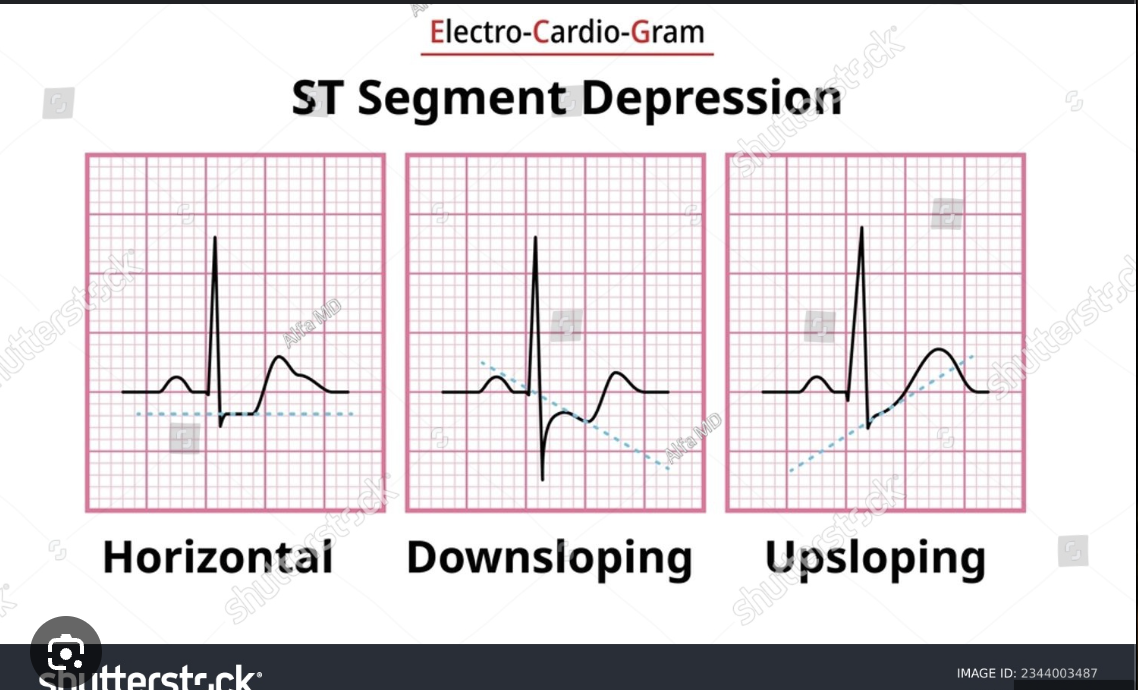

Finding from the above:
+ 172 observations have 0 value for Cholesterol, so might want to consider to impute mean values
+ only 368 observations of Oldpeak have 0 values, where are the rest have some values. 

<Axes: xlabel='Oldpeak', ylabel='ST_Slope'>

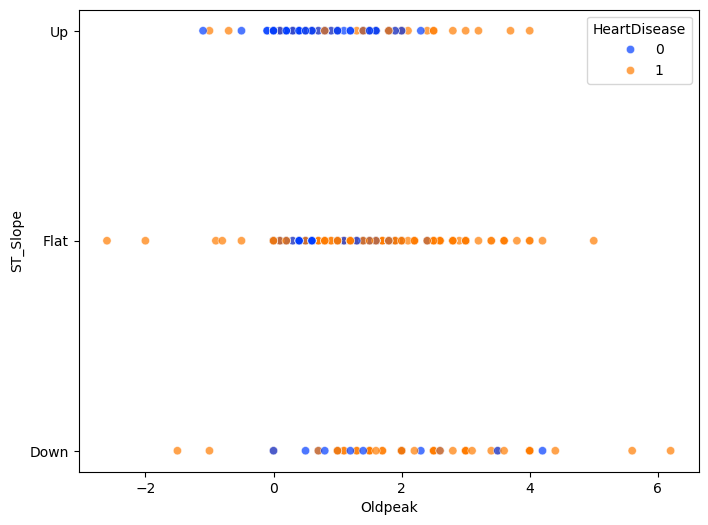

In [8]:
# build vizualization on Oldpeak readings and ST_slope records
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df,
                x = df['Oldpeak'],
                y = df['ST_Slope'],
                hue= df['HeartDisease'],
                palette="bright",
                alpha=0.7)

We can see that prevalent number of heart failure cases occur with ST_slope reading flat or down, also oldpeak values associated with heart disease are spread well from 0 values, with 0 values being more representative for healthy condition

In [ ]:
# examine how many men and women were analyzed
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [ ]:
# calculate how ST Slope readings spread across the genders
df.groupby(["Sex", "ST_Slope"]).size().unstack()


ST_Slope,Down,Flat,Up
Sex,,,
F,7,75,111
M,56,385,284


In [ ]:
# examine how the results are expressed in dataset
df['HeartDisease'].unique()

array([0, 1])

In [ ]:
# number of cases of heart disease in dataset, where 1 - patient has disease, 0 - patient does not have it
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

<Axes: xlabel='RestingECG', ylabel='ST_Slope'>

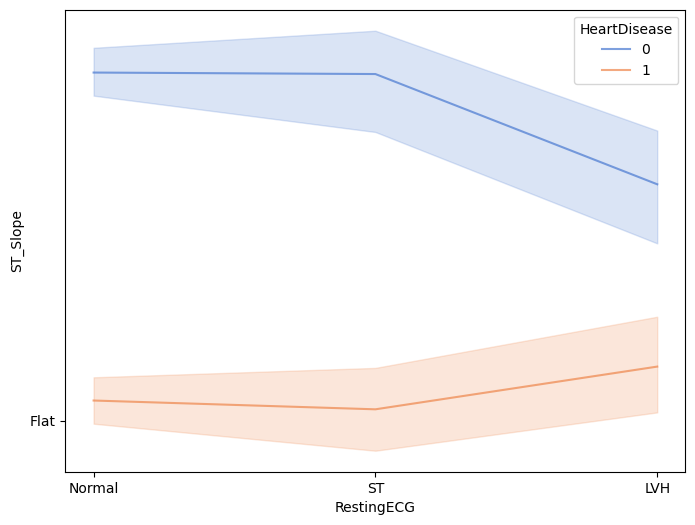

In [37]:
# build vizualization on Oldpeak readings and ST_slope records
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.lineplot(data=df,
                x = df['RestingECG'],
                y = df['ST_Slope'],
                hue= df['HeartDisease'],
                palette="muted",
                alpha=0.7)

<Axes: xlabel='Oldpeak', ylabel='Count'>

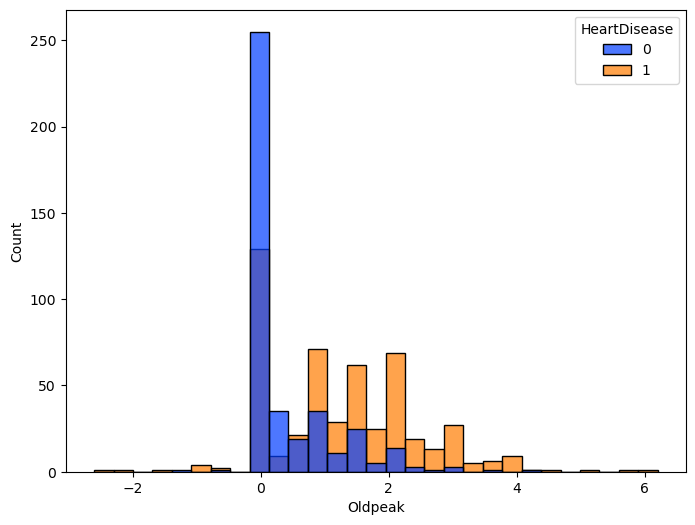

In [35]:
# build vizualization on Oldpeak records and correlation with Heart disease
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.histplot(data=df,
                x = df['Oldpeak'],
                hue= df['HeartDisease'],
                palette="bright",
                alpha=0.7)